In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data= pd.read_csv('C://Users//Ali//Documents//GitHub//PredictiveMaintenance//Predictive-Maintainence-master//data.csv')

In [3]:
# chosing sensors
sensors=data.iloc[:, 5:27] 

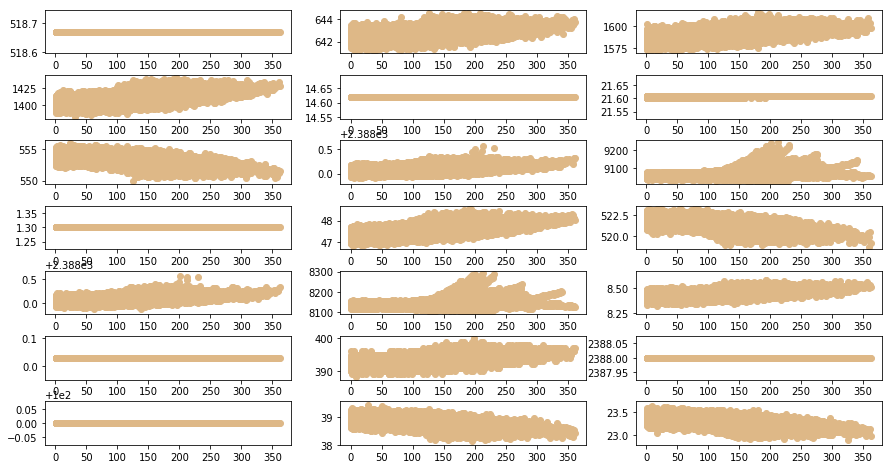

In [4]:
# Plotting sensors data
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
for i in range(1, 22):
    ax = fig.add_subplot(7, 3, i)
    sensorNo='Sensor'+str(i)
    ax.scatter(data['RUL'], sensors[sensorNo], color='burlywood')

In [5]:
RUL_train=data.groupby('Engine').tail(1)
RUL_train['RUL'].describe()

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: RUL, dtype: float64

In [6]:
greatCondition=data.groupby('Engine').head(30)
worstCondition=data.groupby('Engine').tail(30)

In [7]:
greatCondition['HI']=1
worstCondition['HI']=0

C:\Users\Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
dataFinal=greatCondition.append(worstCondition,sort=True)

In [9]:
dataFinal = dataFinal[["Sensor2","Sensor3","Sensor4",
                                           "Sensor7","Sensor8","Sensor11",
                                           "Sensor12","Sensor13","Sensor15",
                                           "Sensor20","Sensor21","HI"]]

In [10]:
dataFinal.shape

(6000, 12)

In [11]:
corr = round(dataFinal.corr(),1)
corr.style.background_gradient(cmap='Spectral')

,Sensor2,Sensor3,Sensor4,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor15,Sensor20,Sensor21,HI
Sensor2,1,0.7,0.8,-0.8,0.7,0.8,-0.8,0.8,0.8,-0.8,-0.8,-0.8
Sensor3,0.7,1,0.8,-0.8,0.7,0.8,-0.8,0.7,0.8,-0.8,-0.8,-0.8
Sensor4,0.8,0.8,1,-0.9,0.8,0.9,-0.9,0.8,0.9,-0.8,-0.8,-0.9
Sensor7,-0.8,-0.8,-0.9,1,-0.8,-0.9,0.9,-0.8,-0.8,0.8,0.8,0.8
Sensor8,0.7,0.7,0.8,-0.8,1,0.8,-0.8,0.9,0.8,-0.8,-0.8,-0.7
Sensor11,0.8,0.8,0.9,-0.9,0.8,1,-0.9,0.8,0.9,-0.9,-0.9,-0.9
Sensor12,-0.8,-0.8,-0.9,0.9,-0.8,-0.9,1,-0.8,-0.9,0.8,0.8,0.9
Sensor13,0.8,0.7,0.8,-0.8,0.9,0.8,-0.8,1,0.8,-0.8,-0.8,-0.7
Sensor15,0.8,0.8,0.9,-0.8,0.8,0.9,-0.9,0.8,1,-0.8,-0.8,-0.8
Sensor20,-0.8,-0.8,-0.8,0.8,-0.8,-0.9,0.8,-0.8,-0.8,1,0.8,0.8


In [12]:
testData = pd.read_csv('C://Users//Ali//Documents//GitHub//PredictiveMaintenance//Predictive-Maintainence-master//test.csv')
testDataSensors=testData[["S2","S3","S4",
                                 "S7","S8","S11"
                                 ,"S12","S13","S15",
                                 "S20","S21"]]

In [13]:
testDataSensors.rename(columns={"S2":"Sensor2",
                         "S3":"Sensor3",
                         "S4":"Sensor4",
                         "S7":"Sensor7",
                         "S8":"Sensor8",
                         "S11":"Sensor11",
                         "S12":"Sensor12",
                         "S13":"Sensor13",
                         "S15":"Sensor15",
                         "S20":"Sensor20",
                         "S21":"Sensor21"
                        }, inplace=True)

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
dataFinal_X=dataFinal.drop(columns='HI')
dataFinal_Y=dataFinal['HI']

In [16]:
dataFinal_X.shape

(6000, 11)

In [17]:
lm=LinearRegression()
lm.fit(dataFinal_X, dataFinal_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
test_HI=lm.predict(testDataSensors)
test_HI=pd.DataFrame({'HI':test_HI})
testData=pd.concat([testData,test_HI],axis=1)

In [19]:
testData.head()

,Engine,Unit,OP1,OP2,OP3,S1,S2,S3,S4,S5,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,HI
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,0.932452
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,1.087708
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,0.897626
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,0.929597
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,0.968395


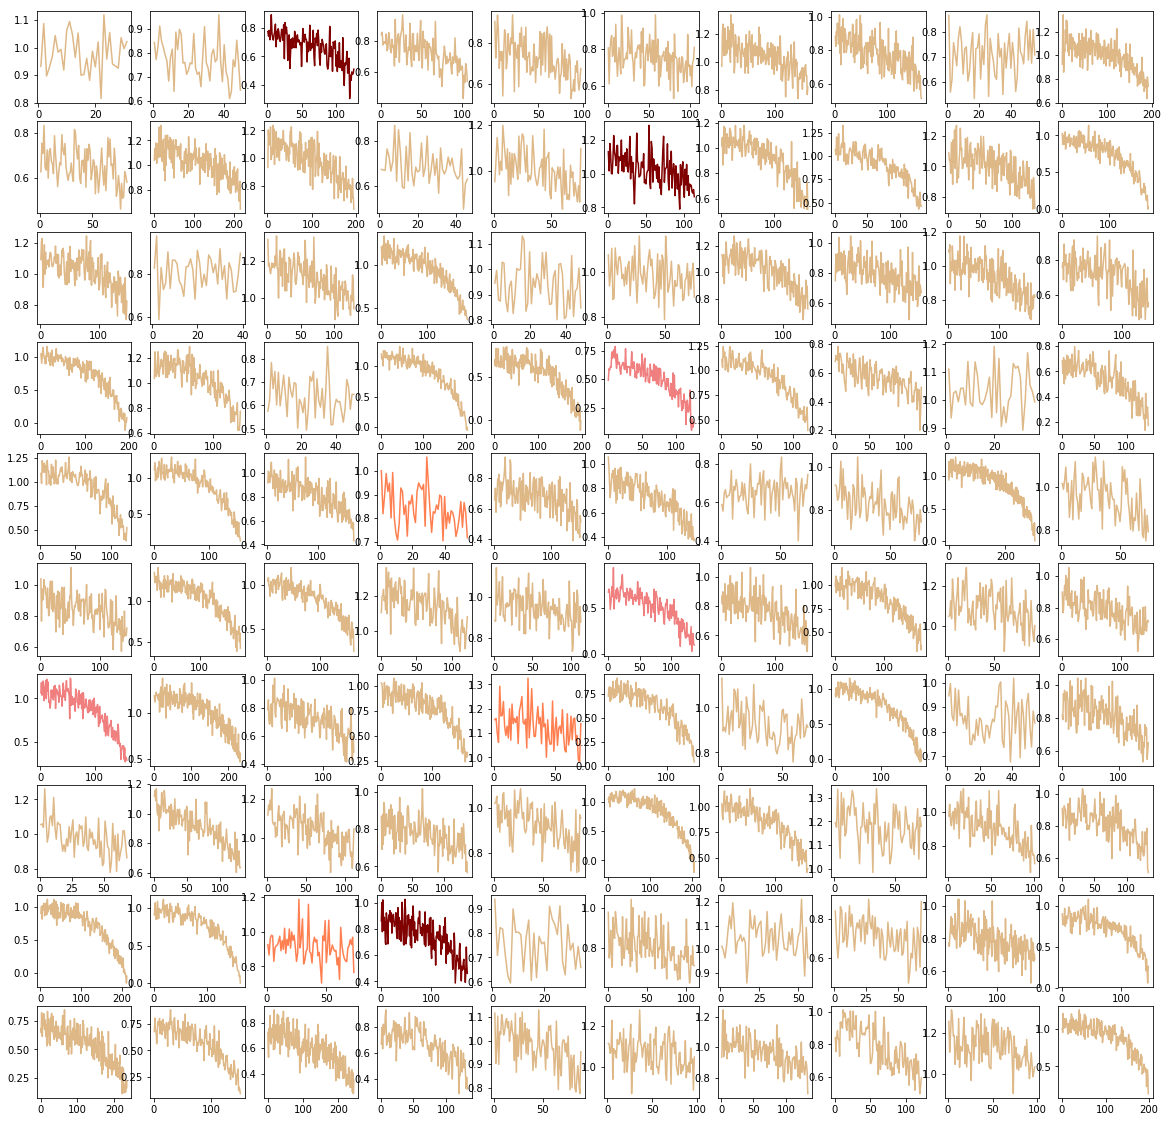

In [236]:
fig = plt.figure(figsize=(20,20))
for i in range(1,101):
        ax = fig.add_subplot(10, 10, i)
        X_axis=testData[testData['Engine']==i]['Unit']
        Y_axis=testData[testData['Engine']==i]['HI']
        if i in (56,36,61):
            col='lightcoral'
        elif i in (84,3,16):
            col='maroon'
        elif i in (44,65,83):
            col='coral'
        else:
            col='burlywood'
        ax.plot(X_axis,Y_axis,color=col)

        

In [244]:
finalData=testData[['Engine','HI']]
finalData.to_csv('finalData.csv', index=False)